# 01 — Data Download & Cleaning (UK Regions)

This notebook downloads, cleans, and prepares UK regional house price data and Bank of England interest rate data for analysis.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)


Matplotlib is building the font cache; this may take a moment.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)


In [3]:
from pathlib import Path

# Go up one directory from notebooks/ to project root
PROJECT_ROOT = Path("..")

DATA_RAW = PROJECT_ROOT / "data" / "raw"
ukhpi_path = DATA_RAW / "ukhousepriceindexmonthlypricestatistics7.xlsx"

ukhpi_path.exists()



False

In [4]:
from pathlib import Path

Path.cwd()


PosixPath('/Users/Char/Documents/GitHub/uk-housing-vs-interest-rates/notebooks')

In [5]:
list(Path.cwd().iterdir())


[PosixPath('/Users/Char/Documents/GitHub/uk-housing-vs-interest-rates/notebooks/01_data_download_and_clean.ipynb'),
 PosixPath('/Users/Char/Documents/GitHub/uk-housing-vs-interest-rates/notebooks/.ipynb_checkpoints')]

In [6]:
from pathlib import Path

project_root = Path.cwd().parent
project_root


PosixPath('/Users/Char/Documents/GitHub/uk-housing-vs-interest-rates')

In [7]:
list(project_root.iterdir())

[PosixPath('/Users/Char/Documents/GitHub/uk-housing-vs-interest-rates/data:raw:'),
 PosixPath('/Users/Char/Documents/GitHub/uk-housing-vs-interest-rates/.DS_Store'),
 PosixPath('/Users/Char/Documents/GitHub/uk-housing-vs-interest-rates/LICENSE'),
 PosixPath('/Users/Char/Documents/GitHub/uk-housing-vs-interest-rates/requirements.txt'),
 PosixPath('/Users/Char/Documents/GitHub/uk-housing-vs-interest-rates/src:'),
 PosixPath('/Users/Char/Documents/GitHub/uk-housing-vs-interest-rates/README.md'),
 PosixPath('/Users/Char/Documents/GitHub/uk-housing-vs-interest-rates/reports:'),
 PosixPath('/Users/Char/Documents/GitHub/uk-housing-vs-interest-rates/.gitignore'),
 PosixPath('/Users/Char/Documents/GitHub/uk-housing-vs-interest-rates/.venv'),
 PosixPath('/Users/Char/Documents/GitHub/uk-housing-vs-interest-rates/.gitattributes'),
 PosixPath('/Users/Char/Documents/GitHub/uk-housing-vs-interest-rates/.ipynb_checkpoints'),
 PosixPath('/Users/Char/Documents/GitHub/uk-housing-vs-interest-rates/noteboo

In [3]:
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
DATA_RAW = PROJECT_ROOT / "data" / "raw"

print("Project root:", PROJECT_ROOT)
print("Does data/raw exist?", DATA_RAW.exists())

if DATA_RAW.exists():
    print("Files in data/raw:")
    for f in DATA_RAW.iterdir():
        print("-", f.name)


Project root: /Users/Char/Documents/GitHub/uk-housing-vs-interest-rates
Does data/raw exist? True
Files in data/raw:
- ukhousepriceindexmonthlypricestatistics7.xlsx
- Bank Rate history and data  Bank of England Database.csv


In [6]:
ukhpi_path = DATA_RAW / "ukhousepriceindexmonthlypricestatistics7.xlsx"
pd.read_excel(ukhpi_path).head()


,UK House Price Index: monthly price statistics
0,The data in this spreadsheet includes monthly ...
1,Publication dates
2,The data tables in this spreadsheet were origi...
3,Notes
4,Some cells in the tables refer to notes which ...


In [7]:
xl = pd.ExcelFile(ukhpi_path)
xl.sheet_names


['Cover sheet',
 'Contents',
 'Notes',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11']

In [8]:
# Try a likely sheet name; if it errors, we'll pick from xl.sheet_names
sheet = None
for s in xl.sheet_names:
    if "monthly" in s.lower() and "price" in s.lower():
        sheet = s
        break

print("Chosen sheet:", sheet)
ukhpi = pd.read_excel(ukhpi_path, sheet_name=sheet)
ukhpi.head()


Chosen sheet: None


AttributeError: 'dict' object has no attribute 'head'

In [9]:
ukhpi.columns.tolist()


AttributeError: 'dict' object has no attribute 'columns'

In [10]:
ukhpi = pd.read_excel(ukhpi_path, sheet_name="1")
ukhpi.head()


,"UK House Price Index - Indices, countries and regions [note 1] [note 2] [note 6] [note 8]",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,This worksheet contains one table. Some cells ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Time period,United Kingdom,Great Britain,England,Wales,Scotland,Northern Ireland [note 3],North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East,London,South East,South West
2,Jan 2011,59.1,58.7,57.6,59.9,71.3,69.3,73.5,61.2,63.3,55.8,59,55,54,56.3,59
3,Feb 2011,58.7,58.4,57.4,60,69.2,69.3,73.3,60.8,64.3,56.2,58.1,54.4,53.5,56.4,58.6
4,Mar 2011,58.5,58.2,57.2,58.7,69.3,69.3,72.6,60.2,62.8,55.8,57.6,54.8,53.8,56.1,58.6


In [11]:
ukhpi.columns.tolist()


['UK House Price Index - Indices, countries and regions [note 1] [note 2] [note 6] [note 8]',
 'Unnamed: 1',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15']

In [12]:
ukhpi_preview = pd.read_excel(ukhpi_path, sheet_name="1", header=None)
ukhpi_preview.head(20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,"UK House Price Index - Indices, countries and ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,This worksheet contains one table. Some cells ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Time period,United Kingdom,Great Britain,England,Wales,Scotland,Northern Ireland [note 3],North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East,London,South East,South West
3,Jan 2011,59.1,58.7,57.6,59.9,71.3,69.3,73.5,61.2,63.3,55.8,59,55,54,56.3,59
4,Feb 2011,58.7,58.4,57.4,60,69.2,69.3,73.3,60.8,64.3,56.2,58.1,54.4,53.5,56.4,58.6
5,Mar 2011,58.5,58.2,57.2,58.7,69.3,69.3,72.6,60.2,62.8,55.8,57.6,54.8,53.8,56.1,58.6
6,Apr 2011,59.4,59.1,58,60.6,71.4,68.2,74.9,61,64.7,56.1,58.6,55,55.1,56.7,58.8
7,May 2011,59.1,58.8,57.7,60.1,71.4,68.2,75.3,60.7,64.7,56.3,58.6,55.1,53.4,56.8,58.5
8,Jun 2011,59.2,58.9,57.8,60.2,72.1,68.2,75.1,60.5,64,56.4,58.7,54.9,53.6,57,59.2
9,Jul 2011,60,59.7,58.5,60.3,73.3,67,73.8,61.4,64.4,57.3,58.8,55.7,55.5,57.7,59.7


In [14]:
import re

raw = pd.read_excel(ukhpi_path, sheet_name="1", header=None)

header_row = None
for i in range(0, 60):
    row = raw.iloc[i].astype(str).str.lower().tolist()
    if any(re.search(r"\bdate\b|\bmonth\b", x) for x in row):
        header_row = i
        break

header_row


In [15]:
raw.head(25)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,"UK House Price Index - Indices, countries and ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,This worksheet contains one table. Some cells ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Time period,United Kingdom,Great Britain,England,Wales,Scotland,Northern Ireland [note 3],North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East,London,South East,South West
3,Jan 2011,59.1,58.7,57.6,59.9,71.3,69.3,73.5,61.2,63.3,55.8,59,55,54,56.3,59
4,Feb 2011,58.7,58.4,57.4,60,69.2,69.3,73.3,60.8,64.3,56.2,58.1,54.4,53.5,56.4,58.6
5,Mar 2011,58.5,58.2,57.2,58.7,69.3,69.3,72.6,60.2,62.8,55.8,57.6,54.8,53.8,56.1,58.6
6,Apr 2011,59.4,59.1,58,60.6,71.4,68.2,74.9,61,64.7,56.1,58.6,55,55.1,56.7,58.8
7,May 2011,59.1,58.8,57.7,60.1,71.4,68.2,75.3,60.7,64.7,56.3,58.6,55.1,53.4,56.8,58.5
8,Jun 2011,59.2,58.9,57.8,60.2,72.1,68.2,75.1,60.5,64,56.4,58.7,54.9,53.6,57,59.2
9,Jul 2011,60,59.7,58.5,60.3,73.3,67,73.8,61.4,64.4,57.3,58.8,55.7,55.5,57.7,59.7


In [16]:
ukhpi = pd.read_excel(ukhpi_path, sheet_name="1", header=2)
ukhpi.head()



,Time period,United Kingdom,Great Britain,England,Wales,Scotland,Northern Ireland [note 3],North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East,London,South East,South West
0,Jan 2011,59.1,58.7,57.6,59.9,71.3,69.3,73.5,61.2,63.3,55.8,59.0,55.0,54.0,56.3,59.0
1,Feb 2011,58.7,58.4,57.4,60.0,69.2,69.3,73.3,60.8,64.3,56.2,58.1,54.4,53.5,56.4,58.6
2,Mar 2011,58.5,58.2,57.2,58.7,69.3,69.3,72.6,60.2,62.8,55.8,57.6,54.8,53.8,56.1,58.6
3,Apr 2011,59.4,59.1,58.0,60.6,71.4,68.2,74.9,61.0,64.7,56.1,58.6,55.0,55.1,56.7,58.8
4,May 2011,59.1,58.8,57.7,60.1,71.4,68.2,75.3,60.7,64.7,56.3,58.6,55.1,53.4,56.8,58.5


In [17]:
ukhpi.columns = (
    ukhpi.columns
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
)

ukhpi.columns.tolist()


['Time period',
 'United Kingdom',
 'Great Britain',
 'England',
 'Wales',
 'Scotland',
 'Northern Ireland [note 3]',
 'North East',
 'North West',
 'Yorkshire and The Humber',
 'East Midlands',
 'West Midlands',
 'East',
 'London',
 'South East',
 'South West']

In [20]:
# Ensure date column is string
ukhpi["date"] = ukhpi["date"].astype(str)

# Remove revision markers like [r]
ukhpi["date"] = ukhpi["date"].str.replace(r"\s*\[.*?\]", "", regex=True)

# Parse dates (now clean)
ukhpi["date"] = pd.to_datetime(ukhpi["date"], errors="raise")



/var/folders/rf/gp34y80n1ml0q0gzcs2qm5p80000gs/T/ipykernel_63079/1293437582.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ukhpi["date"] = pd.to_datetime(ukhpi["date"], errors="raise")


In [21]:
ukhpi["date"].dtype, ukhpi["date"].min(), ukhpi["date"].max()


(dtype('<M8[ns]'),
 Timestamp('2011-01-01 00:00:00'),
 Timestamp('2025-10-01 00:00:00'))

In [22]:
region_cols = [
    "date",
    "North East",
    "North West",
    "Yorkshire and The Humber",
    "East Midlands",
    "West Midlands",
    "East",
    "London",
    "South East",
    "South West",
    "Wales",
    "Scotland",
    "Northern Ireland"
]

ukhpi_regions = ukhpi[region_cols]

ukhpi_long = ukhpi_regions.melt(
    id_vars="date",
    var_name="region",
    value_name="price_index"
)

ukhpi_long.head()


KeyError: "['Northern Ireland'] not in index"

In [23]:
ukhpi.columns.tolist()


['date',
 'United Kingdom',
 'Great Britain',
 'England',
 'Wales',
 'Scotland',
 'Northern Ireland [note 3]',
 'North East',
 'North West',
 'Yorkshire and The Humber',
 'East Midlands',
 'West Midlands',
 'East',
 'London',
 'South East',
 'South West']

In [24]:
region_cols = [
    "date",
    "North East",
    "North West",
    "Yorkshire and The Humber",
    "East Midlands",
    "West Midlands",
    "East",
    "London",
    "South East",
    "South West",
    "Wales",
    "Scotland"
]


In [25]:
ukhpi_regions = ukhpi[region_cols]

ukhpi_long = ukhpi_regions.melt(
    id_vars="date",
    var_name="region",
    value_name="price_index"
)

ukhpi_long.head()


,date,region,price_index
0,2011-01-01,North East,73.5
1,2011-02-01,North East,73.3
2,2011-03-01,North East,72.6
3,2011-04-01,North East,74.9
4,2011-05-01,North East,75.3


In [26]:
regional_cols = [
    "date",
    "North East",
    "North West",
    "Yorkshire and The Humber",
    "East Midlands",
    "West Midlands",
    "East",
    "London",
    "South East",
    "South West",
    "Wales",
    "Scotland"
]

ukhpi_regions = ukhpi[regional_cols]


In [27]:
aggregate_cols = [
    "date",
    "United Kingdom",
    "Great Britain",
    "England"
]

ukhpi_aggregates = ukhpi[aggregate_cols]


In [28]:
ukhpi_regions_long = ukhpi_regions.melt(
    id_vars="date",
    var_name="region",
    value_name="price_index"
)

ukhpi_aggregates_long = ukhpi_aggregates.melt(
    id_vars="date",
    var_name="area",
    value_name="price_index"
)


In [29]:
( PROJECT_ROOT / "data" / "processed" ).mkdir(exist_ok=True)

ukhpi_regions_long.to_csv(
    PROJECT_ROOT / "data" / "processed" / "ukhpi_regions_monthly.csv",
    index=False
)

ukhpi_aggregates_long.to_csv(
    PROJECT_ROOT / "data" / "processed" / "ukhpi_aggregates_monthly.csv",
    index=False
)


In [30]:
bank_rate_path = DATA_RAW / "Bank Rate history and data  Bank of England Database.csv"

bank = pd.read_csv(bank_rate_path)
bank.head()


,Date Changed,Rate
0,18 Dec 25,3.75
1,07 Aug 25,4.00
2,08 May 25,4.25
3,06 Feb 25,4.50
4,07 Nov 24,4.75


In [31]:
bank.columns.tolist()


['Date Changed', 'Rate']

In [32]:
bank = bank.rename(columns={
    "Date Changed": "date",
    "Rate": "bank_rate"
})

bank.head()


,date,bank_rate
0,18 Dec 25,3.75
1,07 Aug 25,4.00
2,08 May 25,4.25
3,06 Feb 25,4.50
4,07 Nov 24,4.75


In [33]:
bank["date"] = pd.to_datetime(bank["date"], errors="raise")
bank.dtypes


/var/folders/rf/gp34y80n1ml0q0gzcs2qm5p80000gs/T/ipykernel_63079/559468322.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bank["date"] = pd.to_datetime(bank["date"], errors="raise")


date         datetime64[ns]
bank_rate           float64
dtype: object

In [34]:
bank = bank.sort_values("date")
bank.head(), bank.tail()


(          date  bank_rate
 257 1975-01-20      11.25
 256 1975-01-27      11.00
 255 1975-02-10      10.75
 254 1975-02-17      10.50
 253 1975-03-10      10.25,
         date  bank_rate
 4 2024-11-07       4.75
 3 2025-02-06       4.50
 2 2025-05-08       4.25
 1 2025-08-07       4.00
 0 2025-12-18       3.75)

In [35]:
bank_monthly = (
    bank
    .set_index("date")
    .resample("MS")   # Month start
    .ffill()
    .reset_index()
)

bank_monthly.head(), bank_monthly.tail()


(        date  bank_rate
 0 1975-01-01        NaN
 1 1975-02-01      11.00
 2 1975-03-01      10.50
 3 1975-04-01      10.00
 4 1975-05-01       9.75,
           date  bank_rate
 607 2025-08-01       4.25
 608 2025-09-01       4.00
 609 2025-10-01       4.00
 610 2025-11-01       4.00
 611 2025-12-01       4.00)

In [36]:
output_path = PROJECT_ROOT / "data" / "processed" / "bank_rate_monthly.csv"
bank_monthly.to_csv(output_path, index=False)

output_path


PosixPath('/Users/Char/Documents/GitHub/uk-housing-vs-interest-rates/data/processed/bank_rate_monthly.csv')

In [37]:
ukhpi_regions = pd.read_csv(
    PROJECT_ROOT / "data" / "processed" / "ukhpi_regions_monthly.csv",
    parse_dates=["date"]
)

bank_monthly = pd.read_csv(
    PROJECT_ROOT / "data" / "processed" / "bank_rate_monthly.csv",
    parse_dates=["date"]
)

ukhpi_regions.head(), bank_monthly.head()


(        date      region  price_index
 0 2011-01-01  North East         73.5
 1 2011-02-01  North East         73.3
 2 2011-03-01  North East         72.6
 3 2011-04-01  North East         74.9
 4 2011-05-01  North East         75.3,
         date  bank_rate
 0 1975-01-01        NaN
 1 1975-02-01      11.00
 2 1975-03-01      10.50
 3 1975-04-01      10.00
 4 1975-05-01       9.75)

In [38]:
merged = ukhpi_regions.merge(
    bank_monthly,
    on="date",
    how="left"
)

merged.head()


,date,region,price_index,bank_rate
0,2011-01-01,North East,73.5,0.5
1,2011-02-01,North East,73.3,0.5
2,2011-03-01,North East,72.6,0.5
3,2011-04-01,North East,74.9,0.5
4,2011-05-01,North East,75.3,0.5


In [39]:
merged.isna().sum()


date           0
region         0
price_index    0
bank_rate      0
dtype: int64

In [40]:
merged["bank_rate"] = merged["bank_rate"].ffill()


In [41]:
output_path = PROJECT_ROOT / "data" / "processed" / "ukhpi_with_bank_rate.csv"
merged.to_csv(output_path, index=False)

output_path


PosixPath('/Users/Char/Documents/GitHub/uk-housing-vs-interest-rates/data/processed/ukhpi_with_bank_rate.csv')

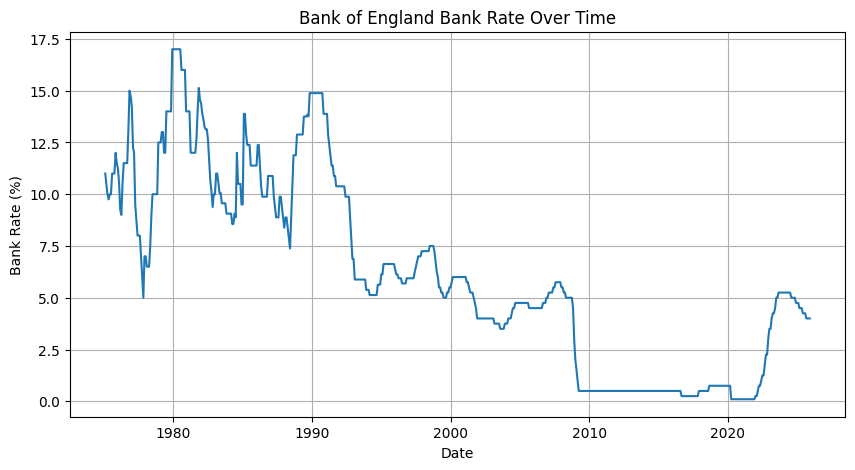

In [42]:
plt.figure(figsize=(10, 5))
plt.plot(bank_monthly["date"], bank_monthly["bank_rate"])
plt.title("Bank of England Bank Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Bank Rate (%)")
plt.grid(True)
plt.show()


In [43]:
regions_to_compare = [
    "North West",
    "West Midlands",
    "South East",
    "London"
]

subset = merged[merged["region"].isin(regions_to_compare)]


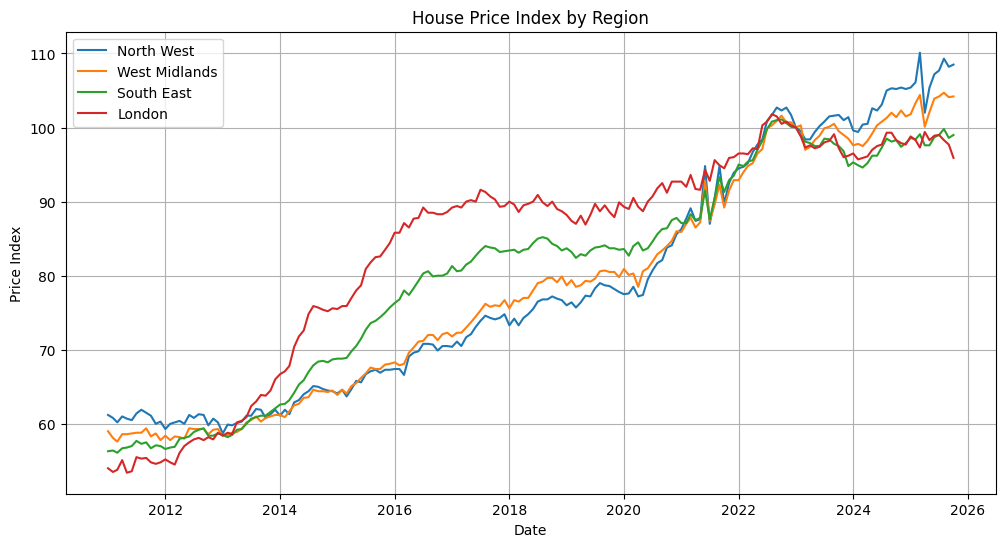

In [44]:
plt.figure(figsize=(12, 6))

for region in regions_to_compare:
    r = subset[subset["region"] == region]
    plt.plot(r["date"], r["price_index"], label=region)

plt.title("House Price Index by Region")
plt.xlabel("Date")
plt.ylabel("Price Index")
plt.legend()
plt.grid(True)
plt.show()


In [51]:
rate_correlation = (
    merged
    .groupby("region")
    .apply(lambda df: df["price_index"].corr(df["bank_rate"]))
    .sort_values()
)

rate_correlation



/var/folders/rf/gp34y80n1ml0q0gzcs2qm5p80000gs/T/ipykernel_63079/2437300463.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: df["price_index"].corr(df["bank_rate"]))


region
London                      0.462417
East                        0.580830
South East                  0.594041
South West                  0.673087
East Midlands               0.692067
West Midlands               0.711900
Scotland                    0.739723
Yorkshire and The Humber    0.741140
Wales                       0.746402
North West                  0.751611
North East                  0.785508
dtype: float64

In [46]:
def lagged_correlation(df, region, max_lag=12):
    region_df = df[df["region"] == region].sort_values("date")
    results = {}
    
    for lag in range(max_lag + 1):
        shifted_rate = region_df["bank_rate"].shift(lag)
        corr = region_df["price_index"].corr(shifted_rate)
        results[lag] = corr
        
    return pd.Series(results)

lag_results = pd.DataFrame({
    region: lagged_correlation(merged, region)
    for region in merged["region"].unique()
})

lag_results.head()


,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East,London,South East,South West,Wales,Scotland
0,0.785508,0.751611,0.741140,0.692067,0.711900,0.580830,0.462417,0.594041,0.673087,0.746402,0.739723
1,0.773962,0.740860,0.730242,0.679933,0.700219,0.568527,0.452269,0.581812,0.658855,0.732934,0.729058
2,0.762224,0.729674,0.718817,0.667399,0.688482,0.555962,0.442236,0.569277,0.643895,0.719937,0.718565
3,0.751051,0.718506,0.707834,0.654908,0.676680,0.543272,0.432287,0.556839,0.629472,0.706796,0.708230
4,0.740261,0.707753,0.696988,0.642671,0.665244,0.531090,0.422420,0.544538,0.615285,0.693498,0.697680


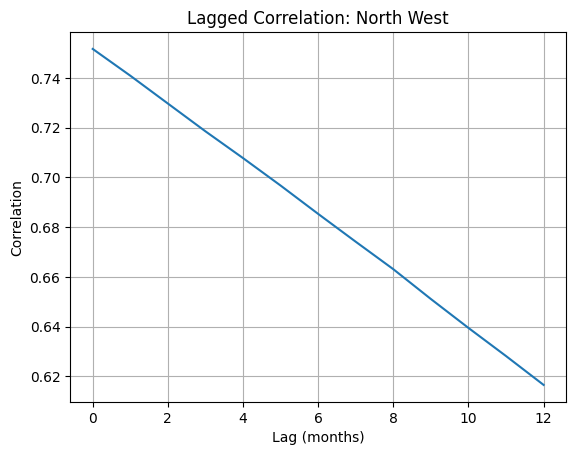

In [47]:
lag_results["North West"].plot(
    title="Lagged Correlation: North West",
    xlabel="Lag (months)",
    ylabel="Correlation"
)
plt.grid(True)
plt.show()


In [48]:
volatility = (
    merged
    .groupby("region")["price_index"]
    .pct_change()
    .groupby(merged["region"])
    .std()
    .sort_values()
)

volatility


region
South East                  0.009570
East                        0.010244
East Midlands               0.011155
London                      0.011651
West Midlands               0.012429
Wales                       0.013737
South West                  0.013836
Scotland                    0.015166
North West                  0.016416
Yorkshire and The Humber    0.016612
North East                  0.020298
Name: price_index, dtype: float64

In [52]:
summary = pd.DataFrame({
    "volatility": volatility,
    "rate_correlation": rate_correlation
})

summary


,volatility,rate_correlation
region,,
East,0.010244,0.580830
East Midlands,0.011155,0.692067
London,0.011651,0.462417
North East,0.020298,0.785508
North West,0.016416,0.751611
Scotland,0.015166,0.739723
South East,0.009570,0.594041
South West,0.013836,0.673087
Wales,0.013737,0.746402


In [54]:
vol_low = summary["volatility"].quantile(0.33)
vol_high = summary["volatility"].quantile(0.66)

corr_low = summary["rate_correlation"].quantile(0.33)
corr_high = summary["rate_correlation"].quantile(0.66)

vol_low, vol_high, corr_low, corr_high

def profile(row):
    if row["volatility"] <= vol_low and row["rate_correlation"] <= corr_low:
        return "Stable & rate-resilient"
    elif row["volatility"] >= vol_high and row["rate_correlation"] >= corr_high:
        return "High growth, rate-sensitive"
    else:
        return "Balanced"

summary["profile"] = summary.apply(profile, axis=1)

summary.sort_values(["profile", "volatility"])

,volatility,rate_correlation,profile
region,,,
East Midlands,0.011155,0.692067,Balanced
West Midlands,0.012429,0.711900,Balanced
Wales,0.013737,0.746402,Balanced
South West,0.013836,0.673087,Balanced
Scotland,0.015166,0.739723,Balanced
North West,0.016416,0.751611,"High growth, rate-sensitive"
Yorkshire and The Humber,0.016612,0.741140,"High growth, rate-sensitive"
North East,0.020298,0.785508,"High growth, rate-sensitive"
South East,0.009570,0.594041,Stable & rate-resilient


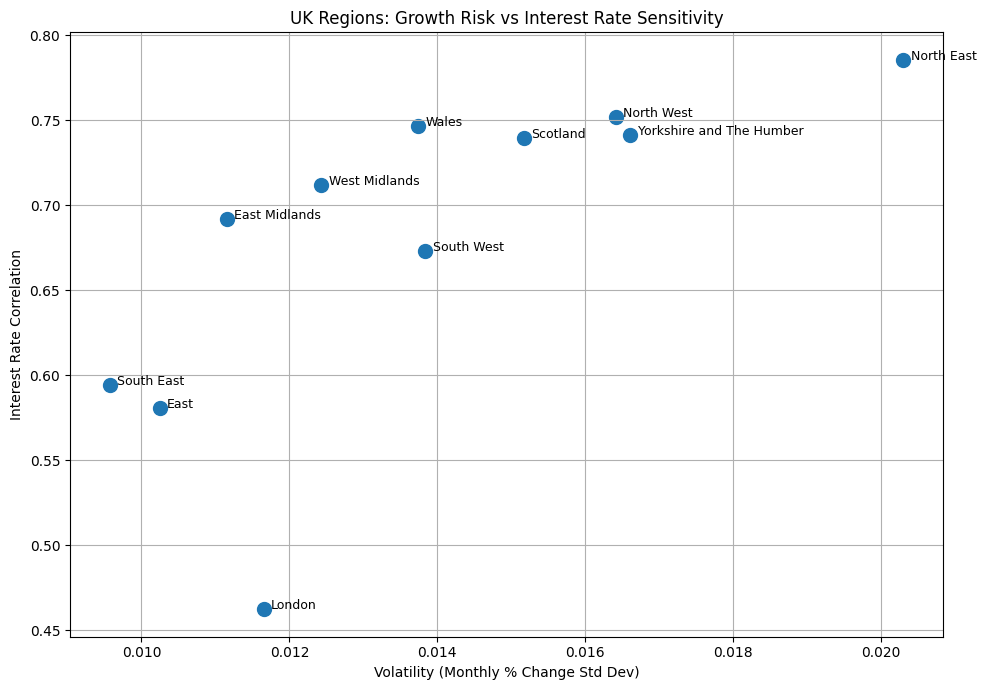

In [56]:
plt.figure(figsize=(10, 7))

plt.scatter(
    summary["volatility"],
    summary["rate_correlation"],
    s=100
)

for region, row in summary.iterrows():
    plt.text(
        row["volatility"] + 0.0001,
        row["rate_correlation"],
        region,
        fontsize=9
    )

plt.xlabel("Volatility (Monthly % Change Std Dev)")
plt.ylabel("Interest Rate Correlation")
plt.title("UK Regions: Growth Risk vs Interest Rate Sensitivity")
plt.grid(True)

plt.tight_layout()
plt.savefig(
    PROJECT_ROOT / "reports" / "figures" / "risk_vs_rate_sensitivity.png"
)
plt.show()



In [57]:
ranked = summary.copy()

ranked["vol_rank"] = ranked["volatility"].rank(ascending=True)
ranked["rate_rank"] = ranked["rate_correlation"].rank(ascending=True)

# Equal weighting (simple and defensible)
ranked["buy_to_let_score"] = ranked["vol_rank"] + ranked["rate_rank"]

ranked = ranked.sort_values("buy_to_let_score")
ranked


,volatility,rate_correlation,profile,vol_rank,rate_rank,buy_to_let_score
region,,,,,,
East,0.010244,0.580830,Stable & rate-resilient,2.0,2.0,4.0
South East,0.009570,0.594041,Stable & rate-resilient,1.0,3.0,4.0
London,0.011651,0.462417,Stable & rate-resilient,4.0,1.0,5.0
East Midlands,0.011155,0.692067,Balanced,3.0,5.0,8.0
South West,0.013836,0.673087,Balanced,7.0,4.0,11.0
West Midlands,0.012429,0.711900,Balanced,5.0,6.0,11.0
Scotland,0.015166,0.739723,Balanced,8.0,7.0,15.0
Wales,0.013737,0.746402,Balanced,6.0,9.0,15.0
Yorkshire and The Humber,0.016612,0.741140,"High growth, rate-sensitive",10.0,8.0,18.0
